In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 180
plt.rc('font',**{'family':'serif','serif':['Times']}) #Plot text font
plt.rc('text', usetex=True)

def reshapee(X): #reshapes matrix to make it normal. My NN takes weird shape only.
    X = X.reshape((X.shape[0],X.shape[1]))
    return X



# Franke function data generation

In [2]:
import numpy as np
from network import Network
from fc_layer import FCLayer
from activation_layer import ActivationLayer
from cost_functions import mse, d_mse, cross_entropy, d_cross_entropy
from sklearn.model_selection import train_test_split
from misc_functions import FrankeFunction, create_X, make_binary, accuracy
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from activations import *

random_state = 333333
rng = np.random
rng.seed(random_state)

N = 30
degree = 1

x = np.sort(rng.uniform(0, 1, N))
y = np.sort(rng.uniform(0, 1, N))
mx, my = np.meshgrid(x, y)

z = FrankeFunction(mx, my) + 0.2*rng.randn(N, N)
z = z.reshape(N*N, 1)

X = create_X(mx, my, degree)
X = X[:,1:]

print(X.shape)
x_train, x_test, y_train, y_test = train_test_split(X, z, test_size=0.2)
print(x_train.shape)

x_train = x_train.reshape((720,1,2))
y_train = y_train.reshape((720,1,1))

(900, 2)
(720, 2)


In [4]:
import autograd.numpy as np
from autograd import grad

d_cross_entropy = grad(cross_entropy)



# Example of how to construct a neural network

This is a neural network that takes in inputs (2 in this case), and connects the 2 nodes to the number of the hidden nodes per layer (64 in this case). For each layer the activation function has to be defined.

In [5]:

# Network
net = Network()
net.add_layer(FCLayer(2,64, random_state))   # 2 Nodes -> 64 nodes          
net.add_layer(ActivationLayer(relu, d_relu)) 
net.add_layer(FCLayer(64, 64, random_state)) # 64 Nodes receive and send to 64
net.add_layer(ActivationLayer(relu, d_relu))
net.add_layer(FCLayer(64,1, random_state))  # 64 Nodes receive then send to 1
net.add_layer(ActivationLayer(linear, d_linear))
net.cost_function(mse, d_mse) 
net.fit(x_train, y_train, epochs = 500, learning_rate=0.00630957344480193, lmbda = 1.389495494373136e-08 )

epoch 1/500   error= 0.0679
epoch 2/500   error= 0.0543
epoch 3/500   error= 0.0534
epoch 4/500   error= 0.0525
epoch 5/500   error= 0.0517
epoch 6/500   error= 0.0511
epoch 7/500   error= 0.0507
epoch 8/500   error= 0.0503
epoch 9/500   error= 0.0499
epoch 10/500   error= 0.0495
epoch 11/500   error= 0.0493
epoch 12/500   error= 0.0490
epoch 13/500   error= 0.0488
epoch 14/500   error= 0.0486
epoch 15/500   error= 0.0484
epoch 16/500   error= 0.0482
epoch 17/500   error= 0.0480
epoch 18/500   error= 0.0478
epoch 19/500   error= 0.0476
epoch 20/500   error= 0.0475
epoch 21/500   error= 0.0473
epoch 22/500   error= 0.0470
epoch 23/500   error= 0.0470
epoch 24/500   error= 0.0468
epoch 25/500   error= 0.0466
epoch 26/500   error= 0.0464
epoch 27/500   error= 0.0463
epoch 28/500   error= 0.0462
epoch 29/500   error= 0.0461
epoch 30/500   error= 0.0460
epoch 31/500   error= 0.0458


KeyboardInterrupt: 

To test the scores of the previous neural network

In [375]:
y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
print(round(r2_score(y_test, y_pred),3) , round(mean_squared_error(y_test, y_pred),4))

0.549 0.0415


# Initializing function for neural networks 
This function serves the purpose of resetting the network with new parameters. Later on this will be very handy when looping different parameters effectively

In [340]:
def reset_net(input_nodes = 2 , hidden_nodes = 64, hidden_layers = 3, 
				act_func = relu, 
				d_act_func = d_relu,
				output_nodes = 1, 
				output_act_func = linear,
				d_output_act_func = d_linear,
				cost_func = mse,
				d_cost_func = d_mse):
	# n_nodes --> Nodes per hidden layer. Kept constant. 
	# rest is self_explanatory. 

	net = Network()
	net.add_layer(FCLayer(input_nodes,hidden_nodes, random_state)) # Input layer         
	net.add_layer(ActivationLayer(act_func, d_act_func))
	
	for i in range(hidden_layers):
		net.add_layer(FCLayer(hidden_nodes, hidden_nodes, random_state))
		net.add_layer(ActivationLayer(act_func, d_act_func))

	net.add_layer(FCLayer(hidden_nodes,output_nodes, random_state)) # Output layer
	net.add_layer(ActivationLayer(output_act_func, d_output_act_func))
	
	net.cost_function(mse, d_mse)

	return net

def class_reset_net(input_nodes = 30 , hidden_nodes = 16, hidden_layers = 1, 
				act_func = sigmoid, 
				d_act_func = d_sigmoid,
				output_nodes = 1, 
				output_act_func = sigmoid,
				d_output_act_func = d_sigmoid,
				cost_func = mse,
				d_cost_func = d_mse):

	# n_nodes --> Nodes per hidden layer. Kept constant. 
	# rest is self_explanatory. 

	net = Network()
	net.add_layer(FCLayer(input_nodes,hidden_nodes, random_state)) # Input layer         
	net.add_layer(ActivationLayer(act_func, d_act_func))
	
	if hidden_layers > 0:
		for i in range(hidden_layers):
			net.add_layer(FCLayer(hidden_nodes, hidden_nodes, random_state))
			net.add_layer(ActivationLayer(act_func, d_act_func))
	
	net.add_layer(FCLayer(hidden_nodes,output_nodes, random_state)) # Output layer
	net.add_layer(ActivationLayer(output_act_func, d_output_act_func))
	
	net.cost_function(mse, d_mse)

	return net

		

# Plotting and Metrics

This plotting function makes the code less cluttery and saved many unnecessary lines.

In [64]:
def plotting_function(x,y, title, xlabel, ylabel, filename):
    plt.plot(x,y, linestyle = 'dashdot', marker = 'o', color = 'red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.savefig('/Users/josefhisanawi/Library/Mobile Documents/com~apple~CloudDocs/5. Semester/FYSSTK/Learning-the-machine/project2/src/Images/' + filename,
     dpi = 300)
    plt.show()
    

The metrics() functions take in a variable that is then changed while all else remains constant. For example for learning rate we can have learning rates [0.001, 0.01, 0.1], we loop over these values and retran a new network then evaluate the performance. The type of regression must be specified, this is done to improve generalization for further use of this code in project 3 or other areas.

In [392]:
def reshapee(X): #reshapes matrix to make it normal. My NN takes weird shape only. This function reverses that.
    X = X.reshape((X.shape[0],X.shape[1]))
    return X

def metrics(x_train, y_train, x_test, y_test, variable, epochs = 500,
             learning_rate = 0.01,
             lmbda = 1e-8, type = 'regression', hidden_layers = 3, output_func = linear, d_output_func = d_linear):
             
    mse_list = []
    R2_list = []
    accuracy_list = []
    
    # Changing the learning rate and plotting the evolution of MSE or accuracy score

    if variable == 'learning_rates':
        if type == 'classification':
            learning_rates = np.logspace(-1.0,-4,10)  # Learning rates for class. too high for regression
            for i in learning_rates:
                net = class_reset_net(hidden_layers=hidden_layers)
                net.fit(x_train, y_train, epochs, lmbda = lmbda, learning_rate=i)
                y_pred = net.predict(x_test)   # Predict values (not 1 or 0)
                y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0

                print(len(y_pred), len(y_test))
                accuracy_list.append(accuracy_score(np.array(y_test), np.array(y_pred)))  #append accuracy
            
            plotting_function(np.log10(learning_rates), accuracy_list, 'Accuracy As A Function of $\eta$',
                                        '$\eta$','Accuracy','part_d_accuracy_eta.png')       
            idx = np.argmax(accuracy_list)   # Remember index with highest accuracy
            return print(f'Maximum accuracy {accuracy_list[idx]} at learning rate: {learning_rates[idx]}')

        elif type == 'regression':
            learning_rates = np.logspace(-2.0,-4,5)
            for i in learning_rates:

                net = reset_net()
                net.fit(x_train, y_train, epochs, lmbda = lmbda, learning_rate=i)
                y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
                R2_list.append(r2_score(y_test, y_pred))
                mse_list.append(mean_squared_error(y_test, y_pred))
            idx = np.argmin(mse_list)

            plotting_function(np.log10(learning_rates), R2_list, 'R2 as a function of learning rate $\eta$', '$\eta$','R2',
                            'part_b_R2.png')

            plotting_function(np.log10(learning_rates), mse_list, 'Mean Squared Error As A Function of $\eta$',
                                '$\eta$','Mean Squared Error','part_b_MSE.png')
        
            return f"Minimum MSE = {mse_list[idx]} at learning rate {learning_rates[idx]}"

    if variable == 'lmbda':
        lmbda = np.logspace(-25, -5, 5)
        
        if type == 'classification': 
            for i in lmbda:
                net = class_reset_net(hidden_layers=hidden_layers)
                net.fit(x_train, y_train, epochs, learning_rate, lmbda = i)
                y_pred = net.predict(x_test)   # Predict values (not 1 or 0)
                y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0
                accuracy_list.append(accuracy_score(np.array(y_test), np.array(y_pred)))  #append accuracy
        
            plotting_function(np.log10(lmbda), accuracy_list, 'Accuracy as a function of regularization parameter $\lambda$',
                                '${\log_{10}} \lambda$','Accuracy %', 'part_d_acc_lambda.png')
            idx = np.argmax(accuracy_list)
            return f"Highest accuracy = {accuracy_list[idx]} at lambda = {lmbda[idx]}"
        
        if type == 'regression':
            for i in lmbda:
                net = reset_net()
                net.fit(x_train, y_train, epochs, learning_rate, lmbda = i)
                y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
                R2_list.append(r2_score(y_test, y_pred))
                mse_list.append(mean_squared_error(y_test, y_pred))
    
            plotting_function(np.log10(lmbda), R2_list, 'R2 as a function of lmbda', '${\log_{10}} \lambda$','R2',
                                'part_b_R2_lambda.png')
            plotting_function(np.log10(lmbda), mse_list, 'Mean Squared Error As A Function of $\lambda $',
                                '${\log_{10}} \lambda$','Mean Squared Error','part_b_MSE_lambda.png')
            
            idx = np.argmin(mse_list)
            return f"Minimum MSE = {mse_list[idx]} at lambda = {lmbda[idx]}"

    if variable == 'hidden_nodes':
        hidden_nodes = [16,32,64,128] # Hidden nodes we're interested in
        
        if type == 'classification':
            for i in hidden_nodes:
                net = class_reset_net(hidden_layers=0,hidden_nodes=i, output_act_func=output_func, d_output_act_func= d_output_func)
                net.fit(x_train, y_train, epochs, lmbda = lmbda, learning_rate=learning_rate)
                y_pred = net.predict(x_test)   # Predict values (not 1 or 0)
                y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0
                accuracy_list.append(accuracy_score(np.array(y_test), np.array(y_pred)))  #append accuracy
            
            plotting_function(hidden_nodes, accuracy_list, 'Accuracy As A Function of Number of Hidden Nodes per Layer',
                                        'Hidden Nodes Per Layer','Accuracy %','part_d_accuracy_hidden_nodes.png')       

            idx = np.argmax(accuracy_list)   # Remember index with highest accuracy
            return print(f'Maximum accuracy {accuracy_list[idx]} at {hidden_nodes[idx]} hidden nodes')

        if type == 'regression':
            for i in hidden_nodes:
                net = reset_net(hidden_nodes = i, hidden_layers=hidden_layers)
                net.fit(x_train, y_train, epochs , learning_rate=learning_rate, lmbda = 0)
                y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
                R2_list.append(r2_score(y_test, y_pred))
                mse_list.append(mean_squared_error(y_test, y_pred))
        
            plotting_function(hidden_nodes, R2_list, 'R2 As a Function of Nodes in Hidden Layers', 'Nodes' ,'R2',
                                'part_b_R2_hidden_nodes.png')

            plotting_function(hidden_nodes, mse_list, 'MSE As a Function of Nodes in Hidden Layers',
                                'Nodes','Mean Squared Error','part_b_MSE_hidden_nodes.png')

            idx = np.argmin(mse_list)
            return f"Minimum MSE = {mse_list[idx]} with {hidden_nodes[idx]} hidden nodes"

    if variable == 'hidden_layers':
        hidden_layers = [1,2,3,4,5,6]
        if type == 'classification':
            for i in hidden_layers:
                net = class_reset_net(hidden_layers=i)
                net.fit(x_train, y_train, epochs, lmbda = lmbda, learning_rate=i)
                y_pred = net.predict(x_test)   # Predict values (not 1 or 0)
                y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0
                accuracy_list.append(accuracy_score(np.array(y_test), np.array(y_pred)))  #append accuracy
            
            plotting_function(hidden_layers, accuracy_list, 'Accuracy As A Function of hidden layers',
                                        "Hidden Layers",'Accuracy [%]','part_d_accuracy_hidden_layers.png')       

            idx = np.argmax(accuracy_list)   # Remember index with highest accuracy
            return print(f'Maximum accuracy {accuracy_list[idx]} at {hidden_layers[idx]} hidden nodes')
        
        if type == 'regression':
            for i in hidden_layers:
                net = reset_net(hidden_layers = i)                
                net.fit(x_train, y_train, epochs, learning_rate, lmbda = 0)
                y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
                R2_list.append(r2_score(y_test, y_pred))
                mse_list.append(mean_squared_error(y_test, y_pred))
        
            plotting_function(hidden_layers, R2_list, 'R2 As a Function of Hidden Layers', 'Hidden Layers' ,'R2',
                                'part_b_R2_hidden_layers.png')

            plotting_function(hidden_layers, mse_list, 'MSE As a Function of total Hidden Layers',
                                'Hidden Layers','Mean Squared Error','part_b_MSE_hidden_layers.png')
            
            print("MSE:", mse_list, "R2:" , R2_list)  # Few numbers. Perhaps table is better than plot

    if variable == 'activation_function':
        act_func = [sigmoid, relu, leaky_relu, tanh, linear]
        d_act_func = [d_sigmoid,  d_relu, d_leaky_relu, d_tanh, d_linear]
        
        if type == 'classification':
            for i,j in zip(act_func, d_act_func):
                net = class_reset_net(act_func= i, d_act_func= j)
                print(i.__name__)
                net.fit(x_train, y_train, epochs = epochs, learning_rate = learning_rate, lmbda=lmbda)
                y_pred = net.predict(x_test)   # Predict values (not 1 or 0)
                y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0
                accuracy_list.append(accuracy_score(np.array(y_test), np.array(y_pred)))  #append accuracy
            print(f"Accuracy:")
            print(f"Sigmoid = {accuracy_list[0]}, ReLU = {accuracy_list[1]}, Leaky_ReLU = {accuracy_list[2]}, tanh = {accuracy_list[3]}, linear =  {accuracy_list[4]}")
            
        if type == 'regression':
            for i,j in zip(act_func, d_act_func):
                net = reset_net(act_func= i, d_act_func= j)
                print(i)
                net.fit(x_train, y_train, epochs, learning_rate=0.01, lmbda = 0)
                y_pred = reshapee(np.array(net.predict(reshapee(x_test))))
                R2_list.append(r2_score(y_test, y_pred))
                mse_list.append(mean_squared_error(y_test, y_pred))

            # Plotting is not a good idea here, instead we print. 
            print(f"MSE:")
            print(f"Sigmoid = {mse_list[0]}, ReLU = {mse_list[1]}, Leaky_ReLU = {mse_list[2]}, tanh = {mse_list[3]}, linear =  {mse_list[4]}")
            print("\n")
            print(f"R2:")
            print(f"Sigmoid = {R2_list[0]},ReLU = {R2_list[1]}, Leaky_ReLU = {R2_list[2]},tanh = {R2_list[3]}, linear =  {R2_list[4]} ")
            
    return 0

# Part B (Franke Function) Analysis

### Metrics analysis

epoch 1/500   error= 0.1284
epoch 2/500   error= 0.0547
epoch 3/500   error= 0.0507
epoch 4/500   error= 0.0499
epoch 5/500   error= 0.0491
epoch 6/500   error= 0.0486
epoch 7/500   error= 0.0475
epoch 8/500   error= 0.0470
epoch 9/500   error= 0.0466
epoch 10/500   error= 0.0462
epoch 11/500   error= 0.0457
epoch 12/500   error= 0.0456
epoch 13/500   error= 0.0455
epoch 14/500   error= 0.0453
epoch 15/500   error= 0.0447
epoch 16/500   error= 0.0452
epoch 17/500   error= 0.0448
epoch 18/500   error= 0.0444
epoch 19/500   error= 0.0444
epoch 20/500   error= 0.0442
epoch 21/500   error= 0.0439
epoch 22/500   error= 0.0438
epoch 23/500   error= 0.0436
epoch 24/500   error= 0.0434
epoch 25/500   error= 0.0432
epoch 26/500   error= 0.0432
epoch 27/500   error= 0.0433
epoch 28/500   error= 0.0431
epoch 29/500   error= 0.0430
epoch 30/500   error= 0.0429
epoch 31/500   error= 0.0427
epoch 32/500   error= 0.0427
epoch 33/500   error= 0.0426
epoch 34/500   error= 0.0428
epoch 35/500   error= 0

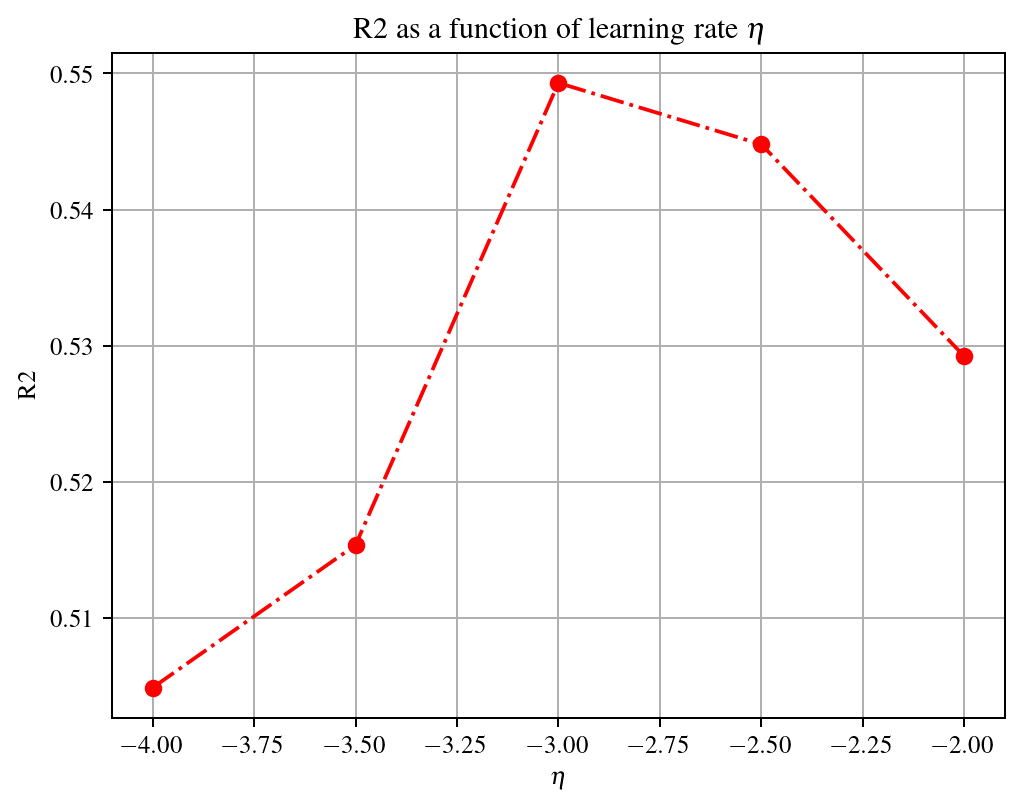

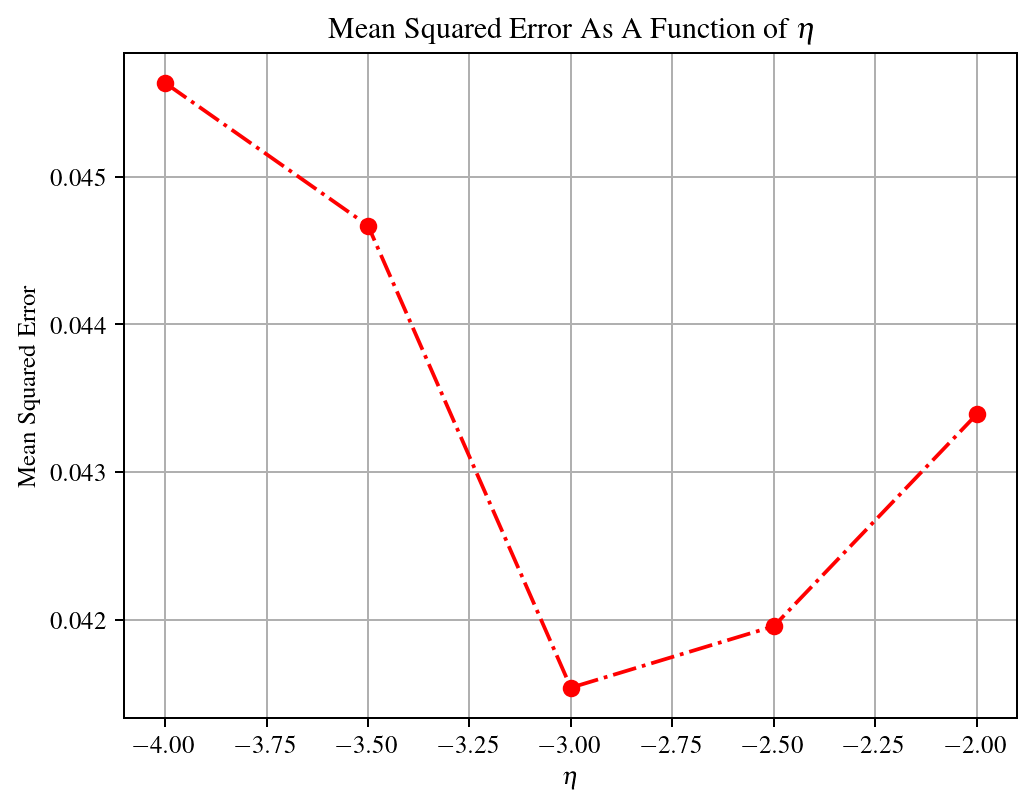

'Minimum MSE = 0.04153953196385115 at learning rate 0.001'

In [283]:
metrics(x_train, y_train, x_test, y_test, "learning_rates")

In [ ]:
optimal_learning_rate = 1e-3

epoch 1/500   error= 0.0931
epoch 2/500   error= 0.0605
epoch 3/500   error= 0.0556
epoch 4/500   error= 0.0532
epoch 5/500   error= 0.0517
epoch 6/500   error= 0.0505
epoch 7/500   error= 0.0500
epoch 8/500   error= 0.0493
epoch 9/500   error= 0.0488
epoch 10/500   error= 0.0483
epoch 11/500   error= 0.0479
epoch 12/500   error= 0.0476
epoch 13/500   error= 0.0473
epoch 14/500   error= 0.0470
epoch 15/500   error= 0.0467
epoch 16/500   error= 0.0464
epoch 17/500   error= 0.0463
epoch 18/500   error= 0.0460
epoch 19/500   error= 0.0459
epoch 20/500   error= 0.0457
epoch 21/500   error= 0.0455
epoch 22/500   error= 0.0455
epoch 23/500   error= 0.0453
epoch 24/500   error= 0.0452
epoch 25/500   error= 0.0451
epoch 26/500   error= 0.0450
epoch 27/500   error= 0.0449
epoch 28/500   error= 0.0448
epoch 29/500   error= 0.0447
epoch 30/500   error= 0.0446
epoch 31/500   error= 0.0445
epoch 32/500   error= 0.0444
epoch 33/500   error= 0.0443
epoch 34/500   error= 0.0443
epoch 35/500   error= 0

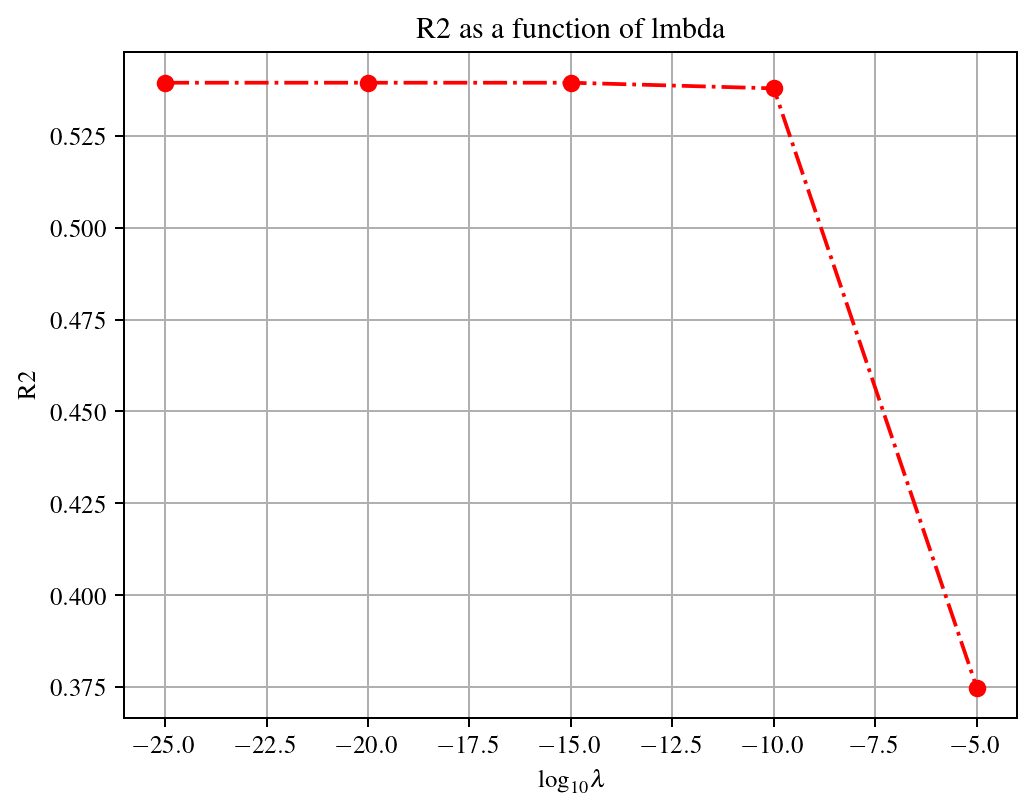

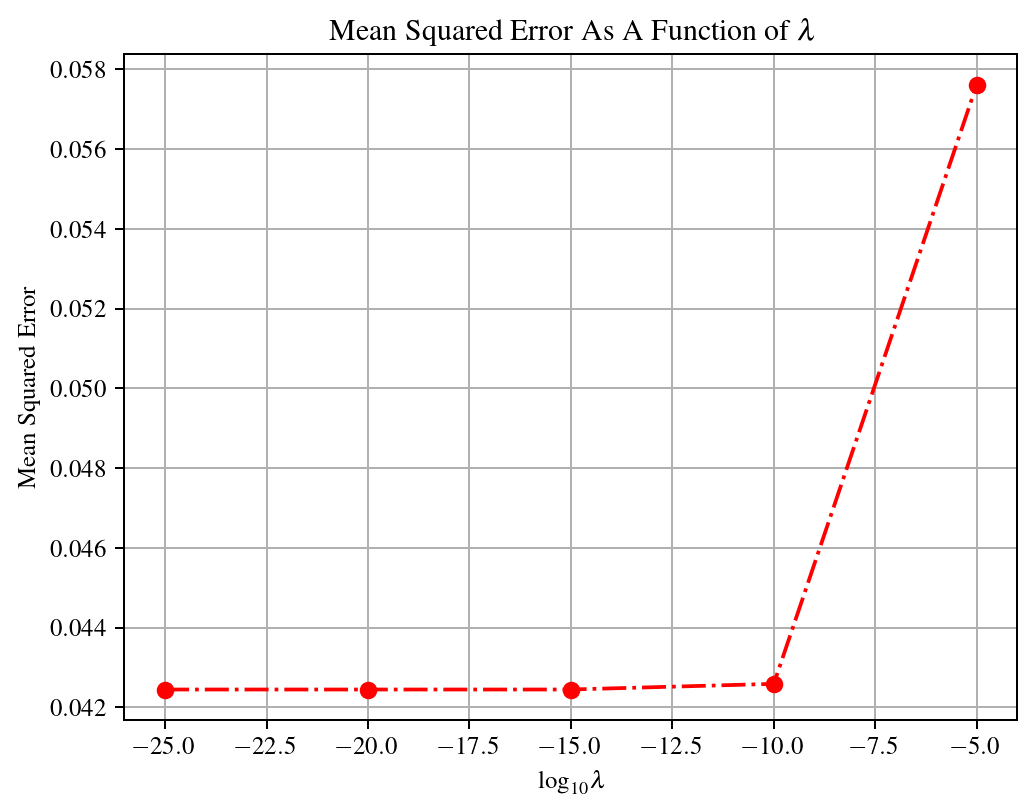

'Minimum MSE = 0.042445684073761404 at lambda = 1e-15'

In [292]:
metrics(x_train, y_train, x_test, y_test,variable= "lmbda", learning_rate= optimal_learning_rate)

In [295]:
optimal_lambda = 1e-15

epoch 1/500   error= 0.1115
epoch 2/500   error= 0.0510
epoch 3/500   error= 0.0499
epoch 4/500   error= 0.0493
epoch 5/500   error= 0.0490
epoch 6/500   error= 0.0488
epoch 7/500   error= 0.0486
epoch 8/500   error= 0.0484
epoch 9/500   error= 0.0483
epoch 10/500   error= 0.0482
epoch 11/500   error= 0.0481
epoch 12/500   error= 0.0480
epoch 13/500   error= 0.0479
epoch 14/500   error= 0.0478
epoch 15/500   error= 0.0477
epoch 16/500   error= 0.0476
epoch 17/500   error= 0.0476
epoch 18/500   error= 0.0475
epoch 19/500   error= 0.0474
epoch 20/500   error= 0.0473
epoch 21/500   error= 0.0473
epoch 22/500   error= 0.0472
epoch 23/500   error= 0.0472
epoch 24/500   error= 0.0472
epoch 25/500   error= 0.0471
epoch 26/500   error= 0.0471
epoch 27/500   error= 0.0470
epoch 28/500   error= 0.0470
epoch 29/500   error= 0.0469
epoch 30/500   error= 0.0468
epoch 31/500   error= 0.0468
epoch 32/500   error= 0.0467
epoch 33/500   error= 0.0467
epoch 34/500   error= 0.0467
epoch 35/500   error= 0

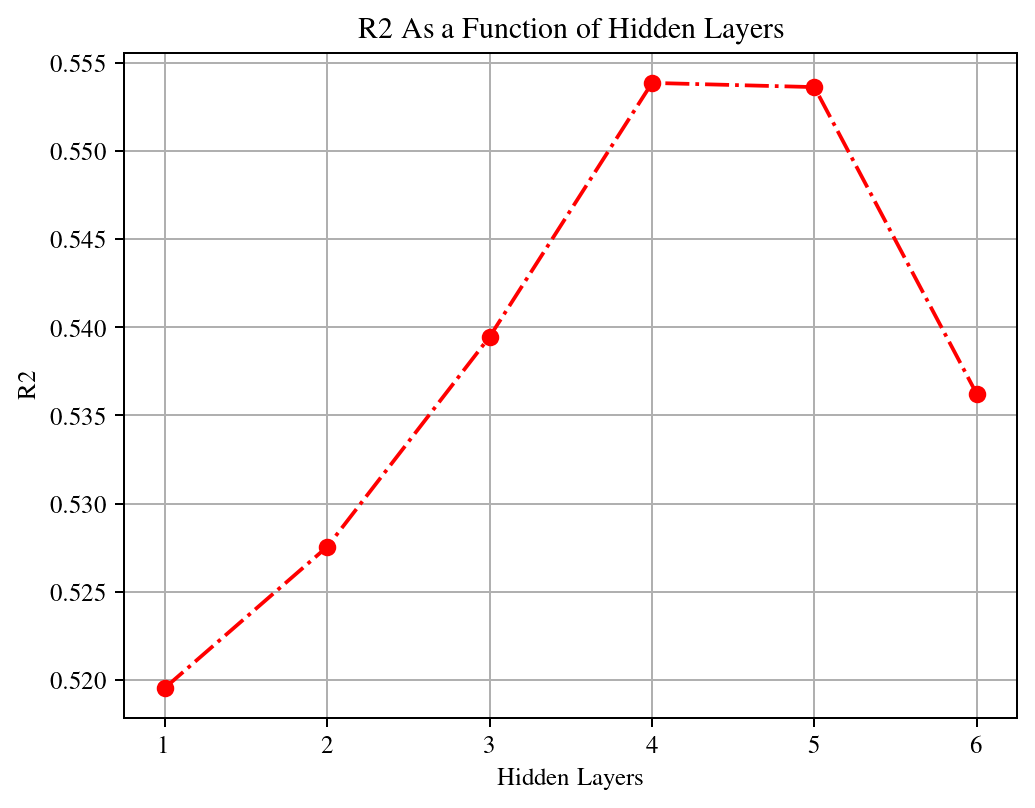

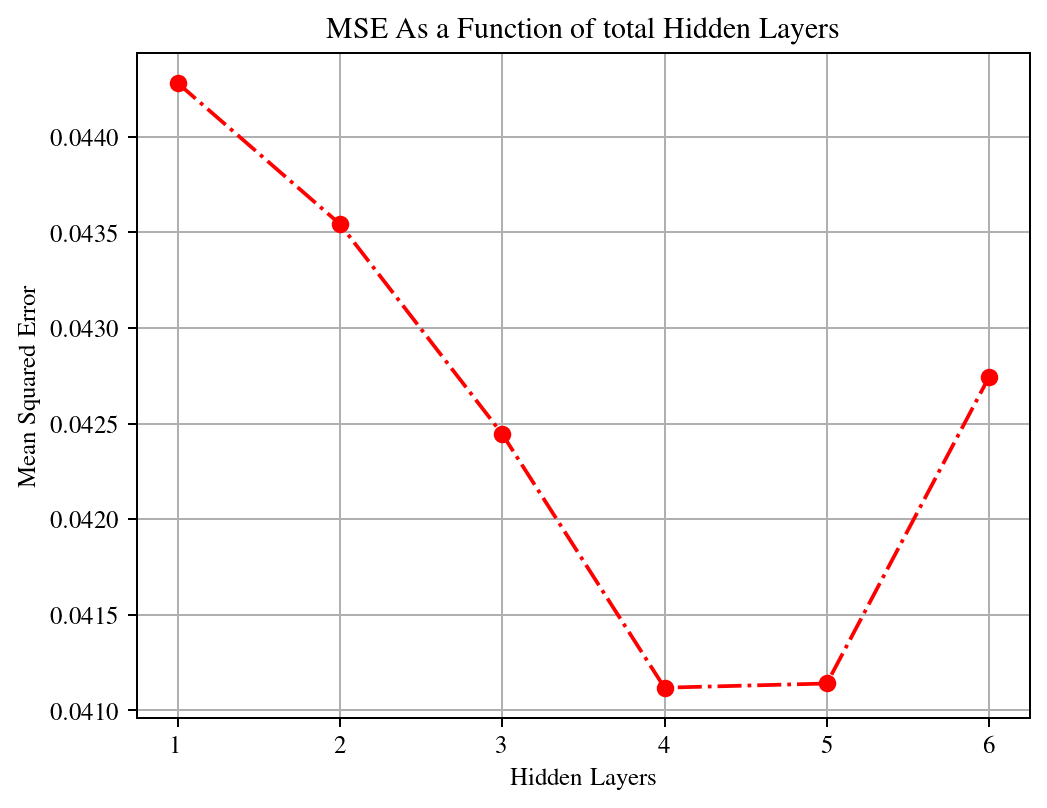

MSE: [0.044281888357124564, 0.0435440018626415, 0.04244568407430478, 0.04111862941991922, 0.04114065701612771, 0.042745046778327765] R2: [0.5195521082376682, 0.5275580001222957, 0.5394744852919383, 0.5538727107201533, 0.5536337165726226, 0.5362264715925187]


0

In [305]:
metrics(x_train, y_train, x_test, y_test, "hidden_layers", lmbda=optimal_lambda, learning_rate=optimal_learning_rate)

epoch 1/500   error= 0.1001
epoch 2/500   error= 0.0820
epoch 3/500   error= 0.0763
epoch 4/500   error= 0.0716
epoch 5/500   error= 0.0670
epoch 6/500   error= 0.0624
epoch 7/500   error= 0.0590
epoch 8/500   error= 0.0567
epoch 9/500   error= 0.0550
epoch 10/500   error= 0.0538
epoch 11/500   error= 0.0529
epoch 12/500   error= 0.0522
epoch 13/500   error= 0.0516
epoch 14/500   error= 0.0511
epoch 15/500   error= 0.0508
epoch 16/500   error= 0.0505
epoch 17/500   error= 0.0504
epoch 18/500   error= 0.0502
epoch 19/500   error= 0.0501
epoch 20/500   error= 0.0500
epoch 21/500   error= 0.0499
epoch 22/500   error= 0.0499
epoch 23/500   error= 0.0498
epoch 24/500   error= 0.0497
epoch 25/500   error= 0.0496
epoch 26/500   error= 0.0496
epoch 27/500   error= 0.0495
epoch 28/500   error= 0.0494
epoch 29/500   error= 0.0494
epoch 30/500   error= 0.0493
epoch 31/500   error= 0.0492
epoch 32/500   error= 0.0492
epoch 33/500   error= 0.0491
epoch 34/500   error= 0.0490
epoch 35/500   error= 0

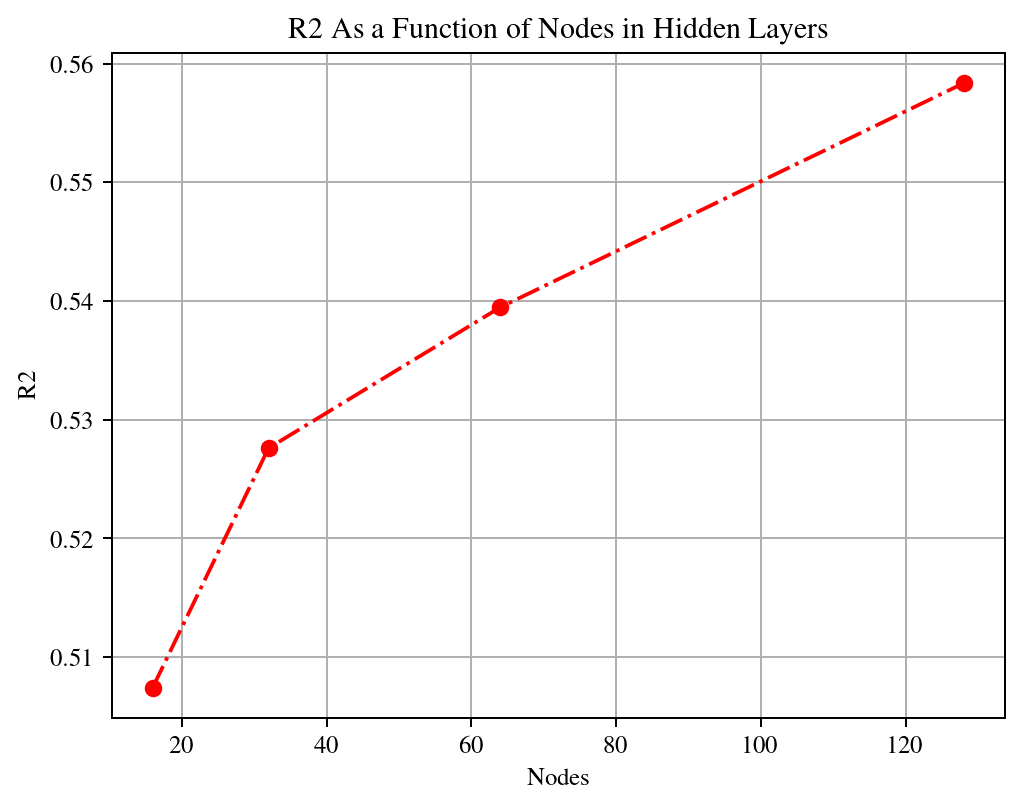

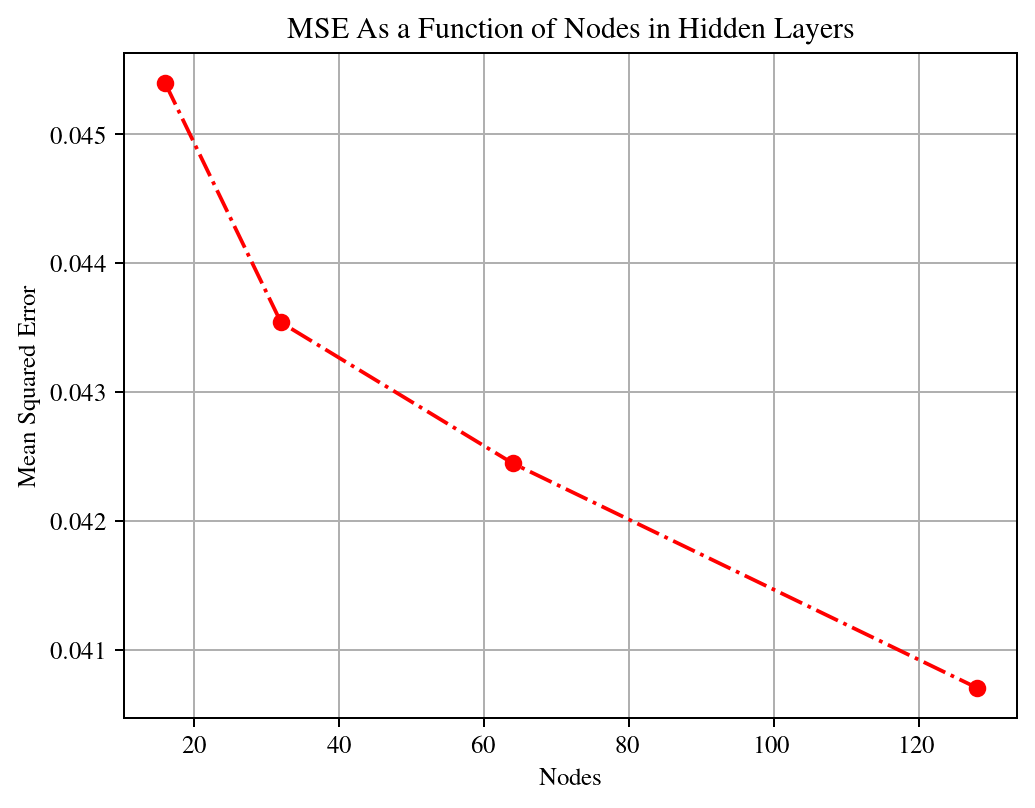

'Minimum MSE = 0.04070418328308286 with 128 hidden nodes'

In [306]:
metrics(x_train, y_train, x_test, y_test, variable="hidden_nodes", learning_rate=optimal_learning_rate, lmbda=optimal_lambda)

In [ ]:
metrics(x_train, y_train, x_test, y_test, "activation_function")

<function sigmoid at 0x122685ea0>
epoch 1/1200   error= 0.0845
epoch 2/1200   error= 0.0752
epoch 3/1200   error= 0.0714
epoch 4/1200   error= 0.0692
epoch 5/1200   error= 0.0680
epoch 6/1200   error= 0.0673
epoch 7/1200   error= 0.0668
epoch 8/1200   error= 0.0664
epoch 9/1200   error= 0.0661
epoch 10/1200   error= 0.0659
epoch 11/1200   error= 0.0656
epoch 12/1200   error= 0.0654
epoch 13/1200   error= 0.0652
epoch 14/1200   error= 0.0649
epoch 15/1200   error= 0.0647
epoch 16/1200   error= 0.0645
epoch 17/1200   error= 0.0643
epoch 18/1200   error= 0.0641
epoch 19/1200   error= 0.0639
epoch 20/1200   error= 0.0637
epoch 21/1200   error= 0.0635
epoch 22/1200   error= 0.0633
epoch 23/1200   error= 0.0631
epoch 24/1200   error= 0.0630
epoch 25/1200   error= 0.0628
epoch 26/1200   error= 0.0626
epoch 27/1200   error= 0.0625
epoch 28/1200   error= 0.0623
epoch 29/1200   error= 0.0621
epoch 30/1200   error= 0.0620
epoch 31/1200   error= 0.0618
epoch 32/1200   error= 0.0617
epoch 33/1200  

0

### Hidden layers and nodes analysis (together)

epoch 1/500   error= 0.1109
epoch 2/500   error= 0.0772
epoch 3/500   error= 0.0746
epoch 4/500   error= 0.0724
epoch 5/500   error= 0.0704
epoch 6/500   error= 0.0685
epoch 7/500   error= 0.0666
epoch 8/500   error= 0.0648
epoch 9/500   error= 0.0628
epoch 10/500   error= 0.0606
epoch 11/500   error= 0.0584
epoch 12/500   error= 0.0567
epoch 13/500   error= 0.0554
epoch 14/500   error= 0.0544
epoch 15/500   error= 0.0536
epoch 16/500   error= 0.0530
epoch 17/500   error= 0.0524
epoch 18/500   error= 0.0520
epoch 19/500   error= 0.0516
epoch 20/500   error= 0.0512
epoch 21/500   error= 0.0509
epoch 22/500   error= 0.0506
epoch 23/500   error= 0.0504
epoch 24/500   error= 0.0502
epoch 25/500   error= 0.0501
epoch 26/500   error= 0.0500
epoch 27/500   error= 0.0498
epoch 28/500   error= 0.0497
epoch 29/500   error= 0.0496
epoch 30/500   error= 0.0496
epoch 31/500   error= 0.0495
epoch 32/500   error= 0.0494
epoch 33/500   error= 0.0494
epoch 34/500   error= 0.0493
epoch 35/500   error= 0

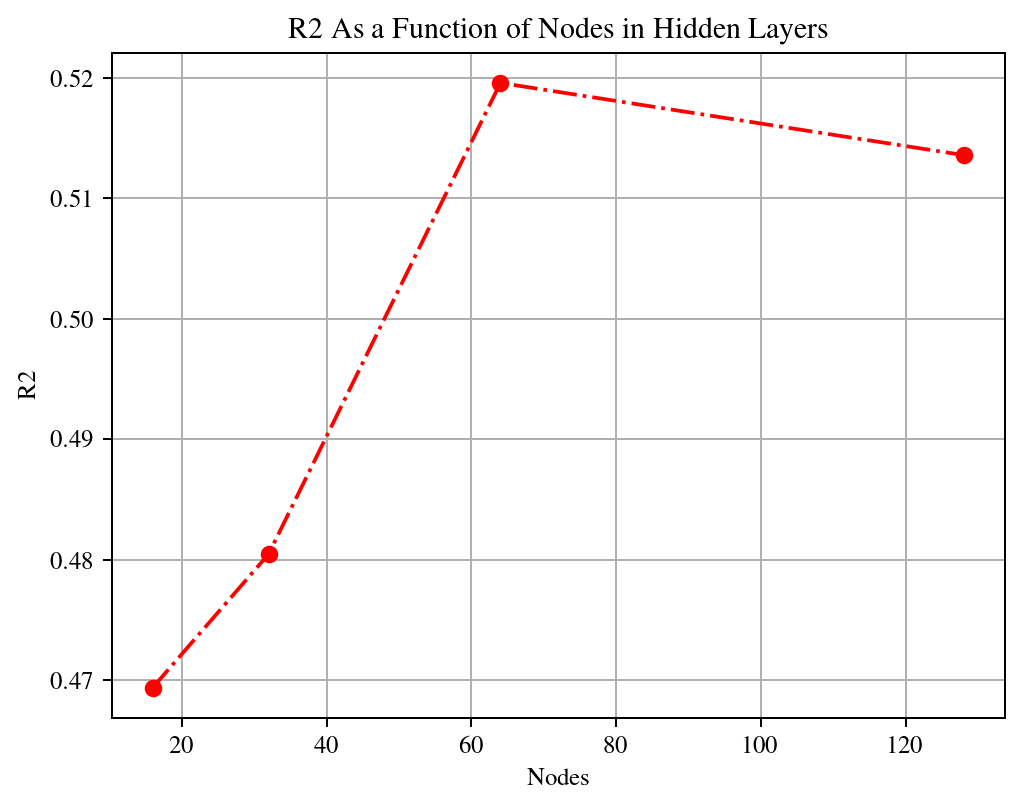

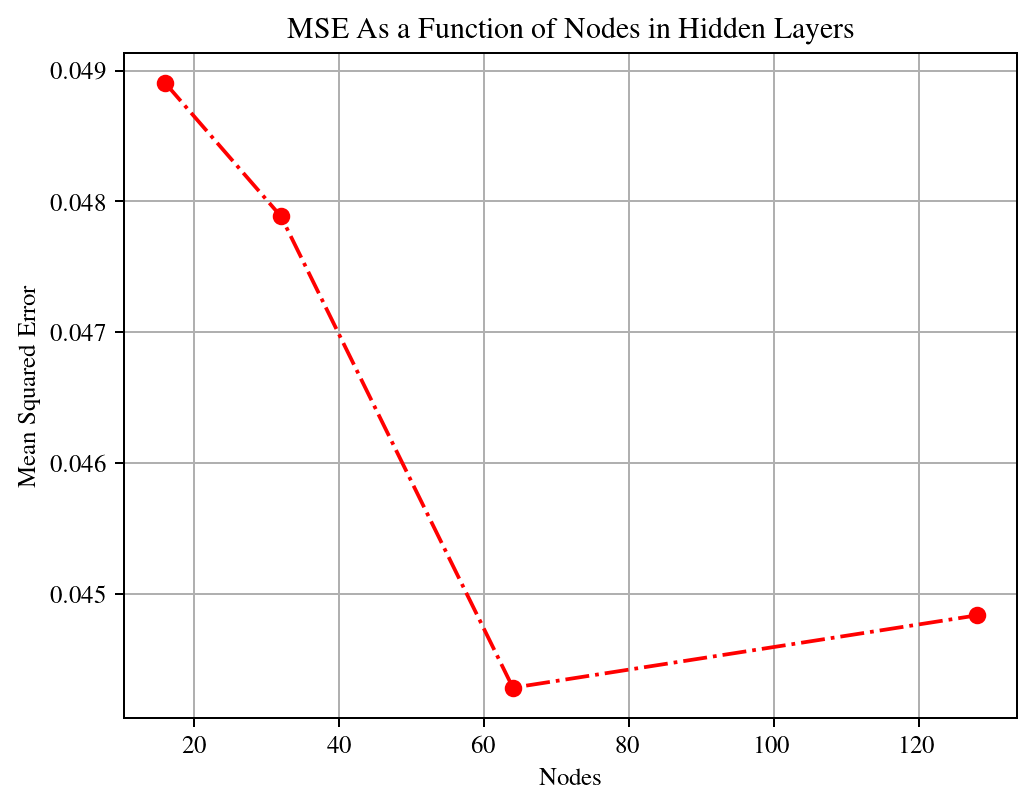

'Minimum MSE = 0.044281888357124564 with 64 hidden nodes'

In [380]:
metrics(x_train, y_train, x_test, y_test, variable="hidden_nodes", learning_rate=optimal_learning_rate, lmbda=optimal_lambda, hidden_layers=1)

epoch 1/500   error= 0.1024
epoch 2/500   error= 0.0895
epoch 3/500   error= 0.0842
epoch 4/500   error= 0.0797
epoch 5/500   error= 0.0758
epoch 6/500   error= 0.0722
epoch 7/500   error= 0.0690
epoch 8/500   error= 0.0662
epoch 9/500   error= 0.0640
epoch 10/500   error= 0.0620
epoch 11/500   error= 0.0603
epoch 12/500   error= 0.0588
epoch 13/500   error= 0.0575
epoch 14/500   error= 0.0563
epoch 15/500   error= 0.0553
epoch 16/500   error= 0.0545
epoch 17/500   error= 0.0538
epoch 18/500   error= 0.0532
epoch 19/500   error= 0.0527
epoch 20/500   error= 0.0523
epoch 21/500   error= 0.0520
epoch 22/500   error= 0.0517
epoch 23/500   error= 0.0515
epoch 24/500   error= 0.0513
epoch 25/500   error= 0.0511
epoch 26/500   error= 0.0510
epoch 27/500   error= 0.0509
epoch 28/500   error= 0.0508
epoch 29/500   error= 0.0507
epoch 30/500   error= 0.0506
epoch 31/500   error= 0.0505
epoch 32/500   error= 0.0505
epoch 33/500   error= 0.0504
epoch 34/500   error= 0.0503
epoch 35/500   error= 0

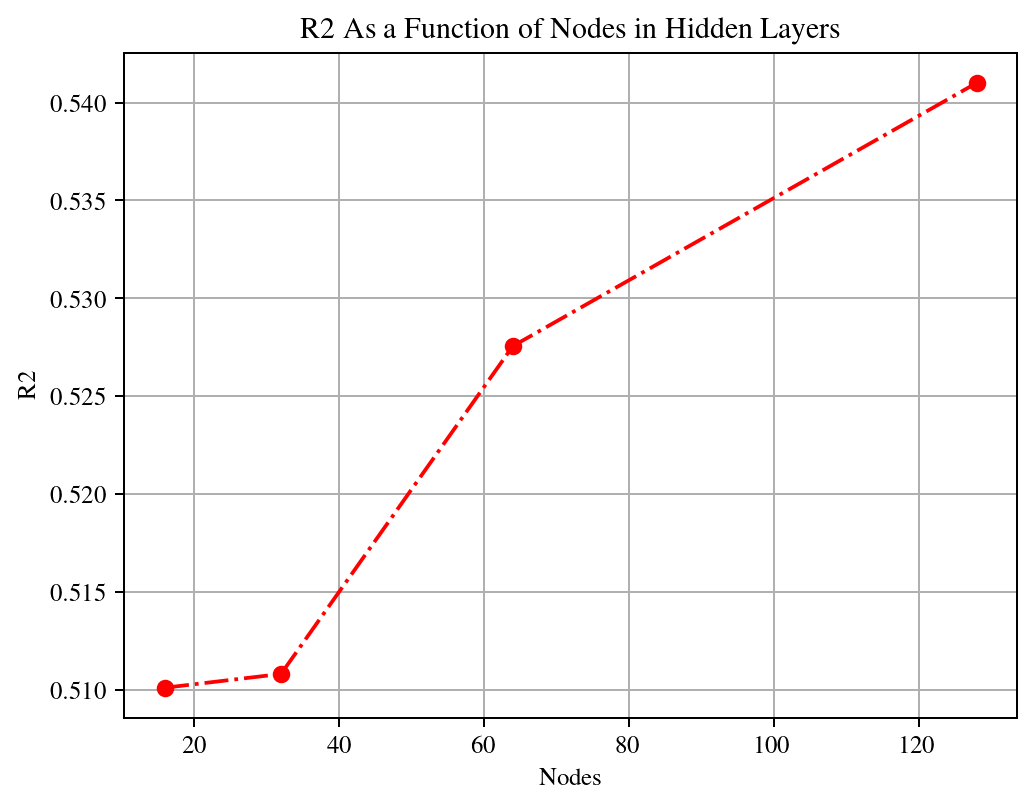

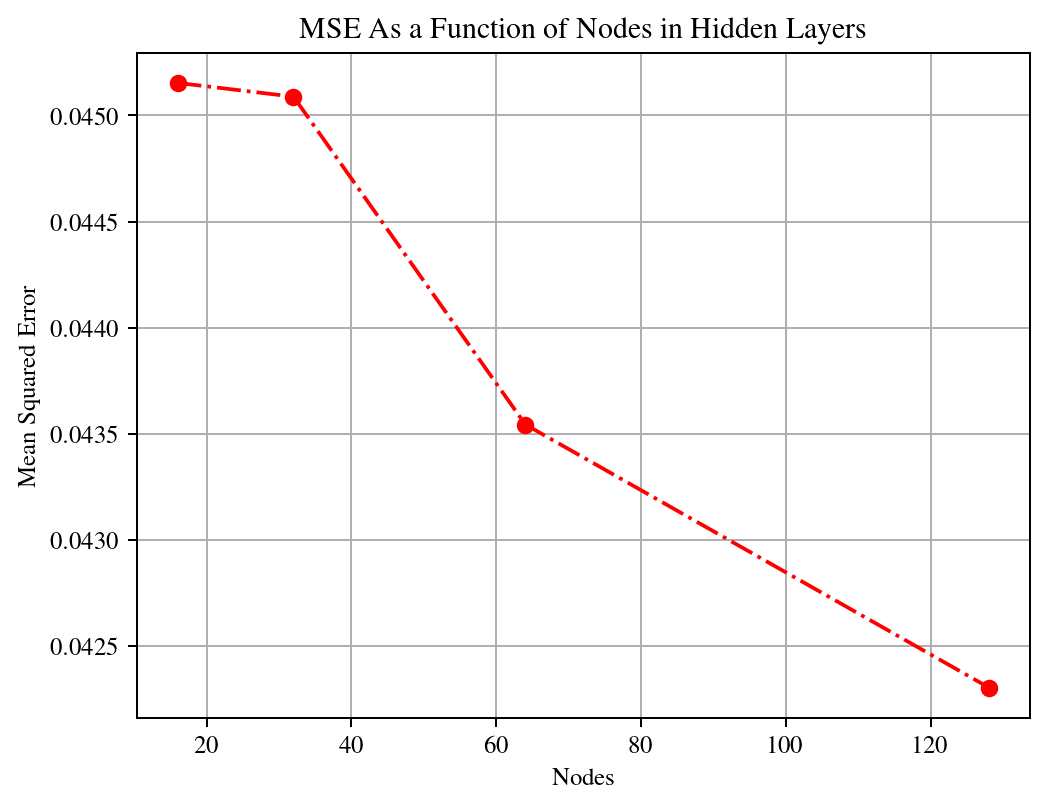

'Minimum MSE = 0.042304252920718544 with 128 hidden nodes'

In [381]:
metrics(x_train, y_train, x_test, y_test, variable="hidden_nodes", learning_rate=optimal_learning_rate, lmbda=optimal_lambda, hidden_layers=2)

epoch 1/500   error= 0.1001
epoch 2/500   error= 0.0820
epoch 3/500   error= 0.0763
epoch 4/500   error= 0.0716
epoch 5/500   error= 0.0670
epoch 6/500   error= 0.0624
epoch 7/500   error= 0.0590
epoch 8/500   error= 0.0567
epoch 9/500   error= 0.0550
epoch 10/500   error= 0.0538
epoch 11/500   error= 0.0529
epoch 12/500   error= 0.0522
epoch 13/500   error= 0.0516
epoch 14/500   error= 0.0511
epoch 15/500   error= 0.0508
epoch 16/500   error= 0.0505
epoch 17/500   error= 0.0504
epoch 18/500   error= 0.0502
epoch 19/500   error= 0.0501
epoch 20/500   error= 0.0500
epoch 21/500   error= 0.0499
epoch 22/500   error= 0.0499
epoch 23/500   error= 0.0498
epoch 24/500   error= 0.0497
epoch 25/500   error= 0.0496
epoch 26/500   error= 0.0496
epoch 27/500   error= 0.0495
epoch 28/500   error= 0.0494
epoch 29/500   error= 0.0494
epoch 30/500   error= 0.0493
epoch 31/500   error= 0.0492
epoch 32/500   error= 0.0492
epoch 33/500   error= 0.0491
epoch 34/500   error= 0.0490
epoch 35/500   error= 0

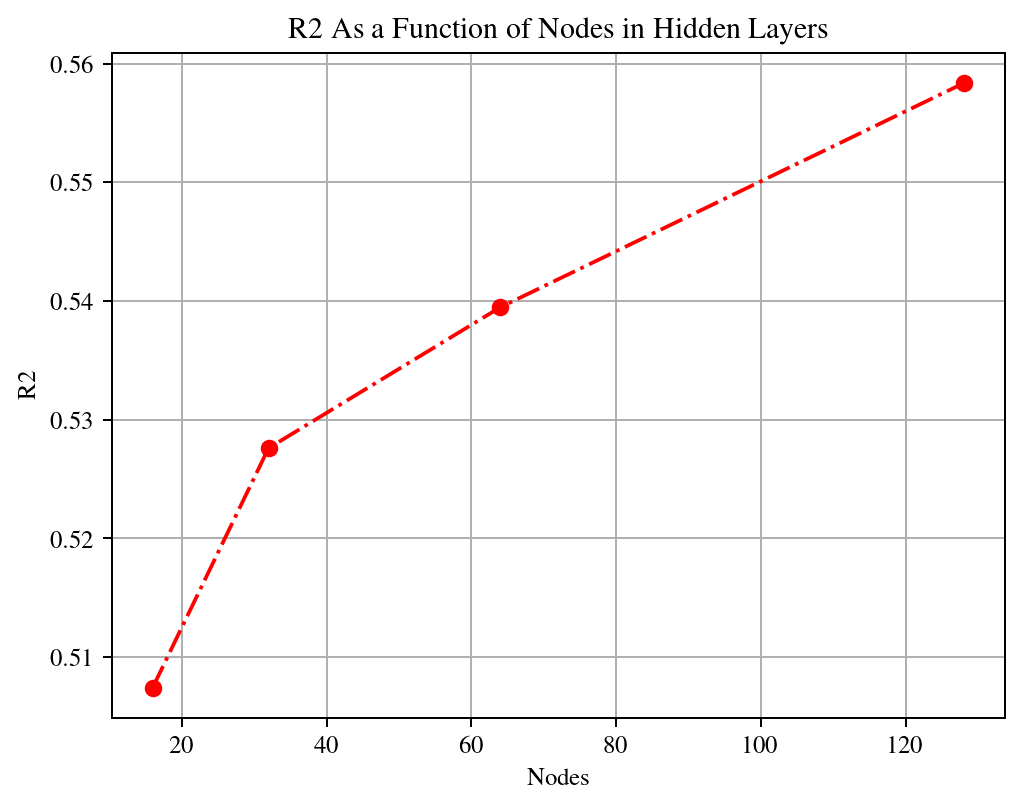

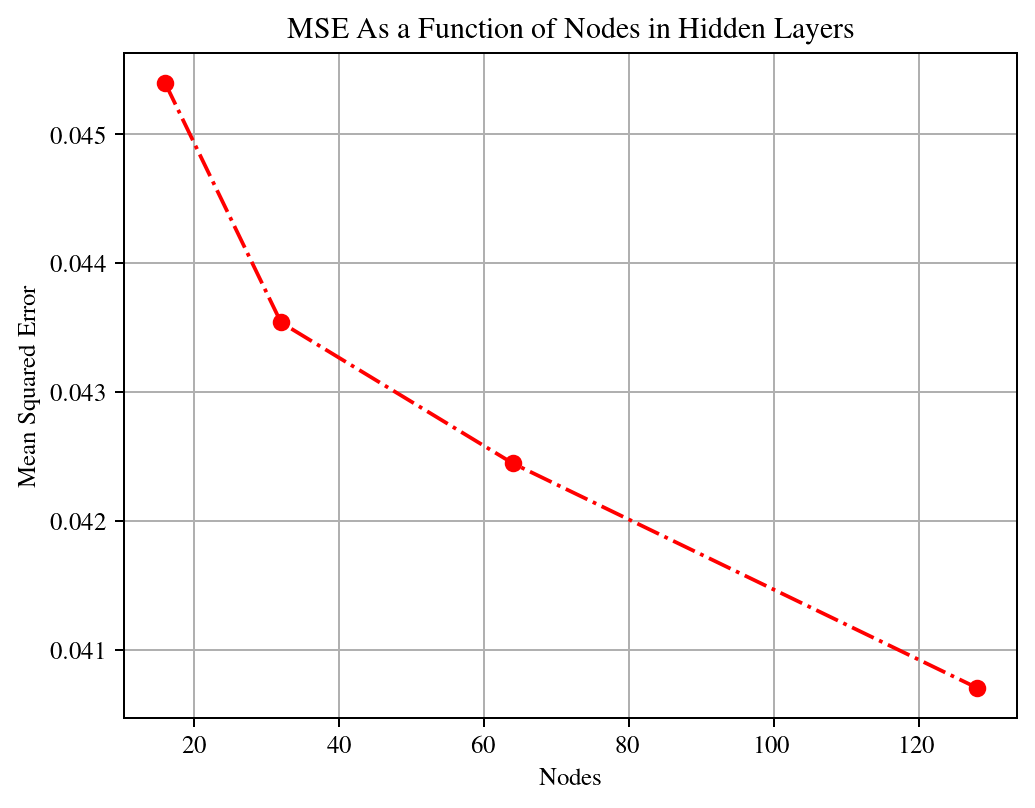

'Minimum MSE = 0.04070418328308286 with 128 hidden nodes'

In [382]:
metrics(x_train, y_train, x_test, y_test, variable="hidden_nodes", learning_rate=optimal_learning_rate, lmbda=optimal_lambda, hidden_layers=3)


### Using optimal parameters together:

In [337]:
net = reset_net(hidden_nodes=128,
         hidden_layers=4,
         act_func=relu,
         d_act_func=d_relu
 )

print(x_test.shape)
net.fit(x_train, y_train, epochs = 1000, learning_rate = 1e-4, lmbda=optimal_lambda)  # Learning rate not 


(180, 2)
epoch 1/1000   error= 0.8625
epoch 2/1000   error= 0.1244
epoch 3/1000   error= 0.1094
epoch 4/1000   error= 0.0999
epoch 5/1000   error= 0.0958
epoch 6/1000   error= 0.0921
epoch 7/1000   error= 0.0901
epoch 8/1000   error= 0.0872
epoch 9/1000   error= 0.0845
epoch 10/1000   error= 0.0818
epoch 11/1000   error= 0.0800
epoch 12/1000   error= 0.0785
epoch 13/1000   error= 0.0763
epoch 14/1000   error= 0.0763
epoch 15/1000   error= 0.0749
epoch 16/1000   error= 0.0739
epoch 17/1000   error= 0.0726
epoch 18/1000   error= 0.0721
epoch 19/1000   error= 0.0709
epoch 20/1000   error= 0.0702
epoch 21/1000   error= 0.0695
epoch 22/1000   error= 0.0688
epoch 23/1000   error= 0.0680
epoch 24/1000   error= 0.0670
epoch 25/1000   error= 0.0672
epoch 26/1000   error= 0.0661
epoch 27/1000   error= 0.0655
epoch 28/1000   error= 0.0650
epoch 29/1000   error= 0.0646
epoch 30/1000   error= 0.0642
epoch 31/1000   error= 0.0639
epoch 32/1000   error= 0.0632
epoch 33/1000   error= 0.0630
epoch 34/1

In [338]:
print(x_test.shape)

y_pred = np.array(net.predict(x_test.reshape(180,1,2)))

print(y_test.shape, y_pred.shape)
mean_squared_error(y_test, y_pred.reshape(180,1))

#0.04876

(180, 2)
(180, 1) (180, 1, 1)


0.048766448376553403

### Using tensorflow as a bench mark on Franke Function

In [441]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

def rmse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))

tf.random.set_seed(42)


model = Sequential([
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    loss='mse',
    metrics= [tf.keras.metrics.MeanSquaredError()],
    optimizer= 'sgd'
)

K.set_value(model.optimizer.learning_rate, 0.1)

print(x_train.shape)
model.fit(x_train.reshape((720,2)), y_train.reshape((720,1)), epochs=500)

(720, 1, 2)
Epoch 1/500
23/23 [==============================] - 1s 19ms/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 2/500
23/23 [==============================] - 0s 9ms/step - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 3/500
23/23 [==============================] - 0s 9ms/step - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 5/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 6/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 7/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 8/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 9/500
23/23 [==============================] - 0s 9ms/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 

In [446]:
predictions = model.predict(x_test)

predictions = np.array(predictions)
predictions = predictions.reshape(180,1)

#predictions = make_binary(predictions,0.5)


print(mean_squared_error(y_test, predictions))


6/6 [==============================] - 0s 5ms/step
0.0491086928759449


# Breast cancer part d

In [397]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

cancer = load_breast_cancer()
X,y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

#print(X_train[:2])
X_train = X_train.reshape((426,1,30))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1] ))
#print(X_train[:2])
print(y_test.shape)

y_train = y_train.reshape((y_train.shape[0],1,1 ))
#y_test = y_test.reshape((y_test.shape[0],1,1 )) 


(143,)


In [ ]:
metrics(x_train, y_train, x_test, y_test, "lmbda")

IndexError: index 426 is out of bounds for axis 0 with size 426

In [ ]:
metrics(x_train, y_train, x_test, y_test,epochs, "hidden_nodes")

IndexError: index 426 is out of bounds for axis 0 with size 426

In [ ]:
metrics(x_train, y_train, x_test, y_test, "hidden_layers")

IndexError: index 426 is out of bounds for axis 0 with size 426

In [ ]:
metrics(x_train, y_train, x_test, y_test, "activation_function")

<function sigmoid at 0x122685ea0>
epoch 1/1200   error= 0.0845
epoch 2/1200   error= 0.0752
epoch 3/1200   error= 0.0714
epoch 4/1200   error= 0.0692
epoch 5/1200   error= 0.0680
epoch 6/1200   error= 0.0673
epoch 7/1200   error= 0.0668
epoch 8/1200   error= 0.0664
epoch 9/1200   error= 0.0661
epoch 10/1200   error= 0.0659
epoch 11/1200   error= 0.0656
epoch 12/1200   error= 0.0654
epoch 13/1200   error= 0.0652
epoch 14/1200   error= 0.0649
epoch 15/1200   error= 0.0647
epoch 16/1200   error= 0.0645
epoch 17/1200   error= 0.0643
epoch 18/1200   error= 0.0641
epoch 19/1200   error= 0.0639
epoch 20/1200   error= 0.0637
epoch 21/1200   error= 0.0635
epoch 22/1200   error= 0.0633
epoch 23/1200   error= 0.0631
epoch 24/1200   error= 0.0630
epoch 25/1200   error= 0.0628
epoch 26/1200   error= 0.0626
epoch 27/1200   error= 0.0625
epoch 28/1200   error= 0.0623
epoch 29/1200   error= 0.0621
epoch 30/1200   error= 0.0620
epoch 31/1200   error= 0.0618
epoch 32/1200   error= 0.0617
epoch 33/1200  

0

In [183]:

net = reset_net(input_nodes=30, act_func= relu, d_act_func= d_relu,
            output_act_func= sigmoid, d_output_act_func=d_sigmoid,
            cost_func= cross_entropy, d_cost_func= d_cross_entropy, output_nodes=1, hidden_layers=2)

net.fit(X_train, y_train, epochs = 500, learning_rate=0.01, lmbda = 1e-7)

epoch 1/500   error= 0.2010
epoch 2/500   error= 0.1614
epoch 3/500   error= 0.1437
epoch 4/500   error= 0.1304
epoch 5/500   error= 0.1207
epoch 6/500   error= 0.1138
epoch 7/500   error= 0.1085
epoch 8/500   error= 0.1043
epoch 9/500   error= 0.1014
epoch 10/500   error= 0.0991
epoch 11/500   error= 0.0971
epoch 12/500   error= 0.0955
epoch 13/500   error= 0.0940
epoch 14/500   error= 0.0928
epoch 15/500   error= 0.0917
epoch 16/500   error= 0.0907
epoch 17/500   error= 0.0900
epoch 18/500   error= 0.0891
epoch 19/500   error= 0.0885
epoch 20/500   error= 0.0881
epoch 21/500   error= 0.0877
epoch 22/500   error= 0.0872
epoch 23/500   error= 0.0871
epoch 24/500   error= 0.0871
epoch 25/500   error= 0.0866
epoch 26/500   error= 0.0868
epoch 27/500   error= 0.0865
epoch 28/500   error= 0.0865
epoch 29/500   error= 0.0863
epoch 30/500   error= 0.0858
epoch 31/500   error= 0.0856
epoch 32/500   error= 0.0857
epoch 33/500   error= 0.0853
epoch 34/500   error= 0.0849
epoch 35/500   error= 0

In [185]:
y_pred = net.predict(X_test)
y_pred = (make_binary(y_pred,0.5))

accuracy_score(y_test, y_pred)

0.951048951048951

### Metrics on breast cancer data

epoch 1/500   error= 0.2646
epoch 2/500   error= 0.2584
epoch 3/500   error= 0.2543
epoch 4/500   error= 0.2509
epoch 5/500   error= 0.2479
epoch 6/500   error= 0.2455
epoch 7/500   error= 0.2435
epoch 8/500   error= 0.2418
epoch 9/500   error= 0.2403
epoch 10/500   error= 0.2390
epoch 11/500   error= 0.2378
epoch 12/500   error= 0.2365
epoch 13/500   error= 0.2352
epoch 14/500   error= 0.2338
epoch 15/500   error= 0.2322
epoch 16/500   error= 0.2303
epoch 17/500   error= 0.2280
epoch 18/500   error= 0.2252
epoch 19/500   error= 0.2216
epoch 20/500   error= 0.2171
epoch 21/500   error= 0.2114
epoch 22/500   error= 0.2043
epoch 23/500   error= 0.1956
epoch 24/500   error= 0.1855
epoch 25/500   error= 0.1744
epoch 26/500   error= 0.1632
epoch 27/500   error= 0.1527
epoch 28/500   error= 0.1433
epoch 29/500   error= 0.1354
epoch 30/500   error= 0.1287
epoch 31/500   error= 0.1231
epoch 32/500   error= 0.1183
epoch 33/500   error= 0.1143
epoch 34/500   error= 0.1108
epoch 35/500   error= 0

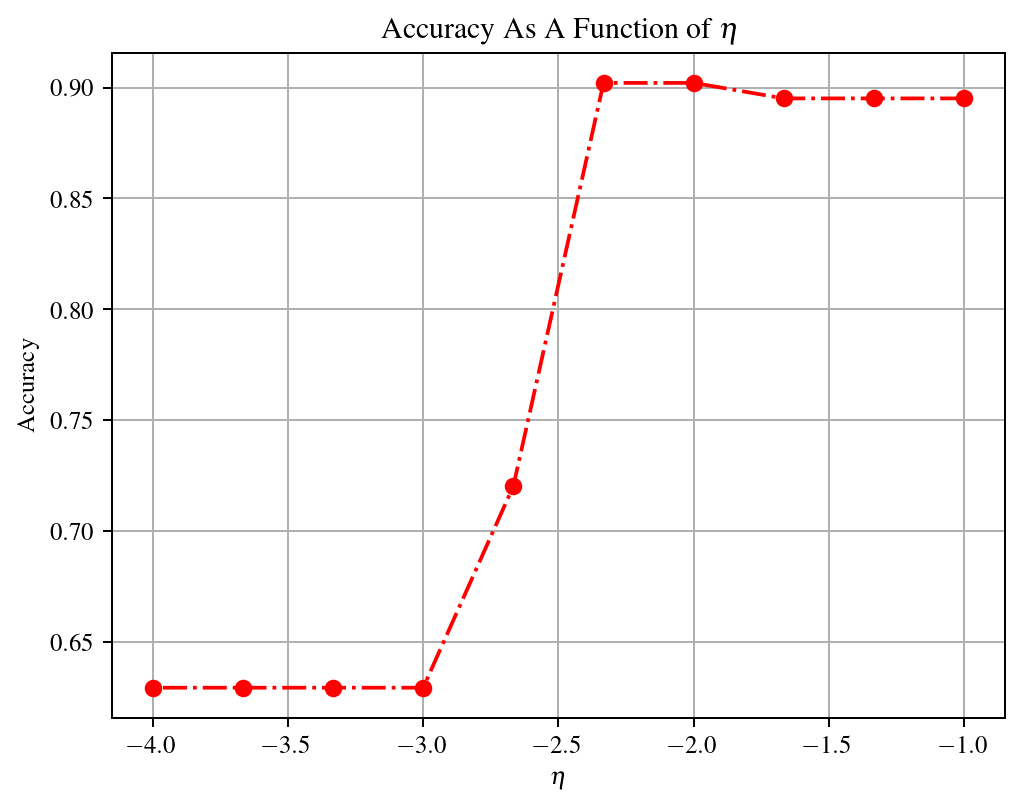

Maximum accuracy 0.9020979020979021 at learning rate: 0.01


In [152]:
metrics(X_train, y_train, X_test, y_test, epochs = 500, variable="learning_rates", type = "classification", lmbda=0 )


epoch 1/500   error= 0.2447
epoch 2/500   error= 0.2386
epoch 3/500   error= 0.2385
epoch 4/500   error= 0.2383
epoch 5/500   error= 0.2382
epoch 6/500   error= 0.2381
epoch 7/500   error= 0.2379
epoch 8/500   error= 0.2378
epoch 9/500   error= 0.2376
epoch 10/500   error= 0.2375
epoch 11/500   error= 0.2373
epoch 12/500   error= 0.2372
epoch 13/500   error= 0.2370
epoch 14/500   error= 0.2369
epoch 15/500   error= 0.2367
epoch 16/500   error= 0.2366
epoch 17/500   error= 0.2364
epoch 18/500   error= 0.2363
epoch 19/500   error= 0.2361
epoch 20/500   error= 0.2360
epoch 21/500   error= 0.2358
epoch 22/500   error= 0.2357
epoch 23/500   error= 0.2355
epoch 24/500   error= 0.2354
epoch 25/500   error= 0.2352
epoch 26/500   error= 0.2350
epoch 27/500   error= 0.2349
epoch 28/500   error= 0.2347
epoch 29/500   error= 0.2346
epoch 30/500   error= 0.2344
epoch 31/500   error= 0.2342
epoch 32/500   error= 0.2340
epoch 33/500   error= 0.2339
epoch 34/500   error= 0.2337
epoch 35/500   error= 0

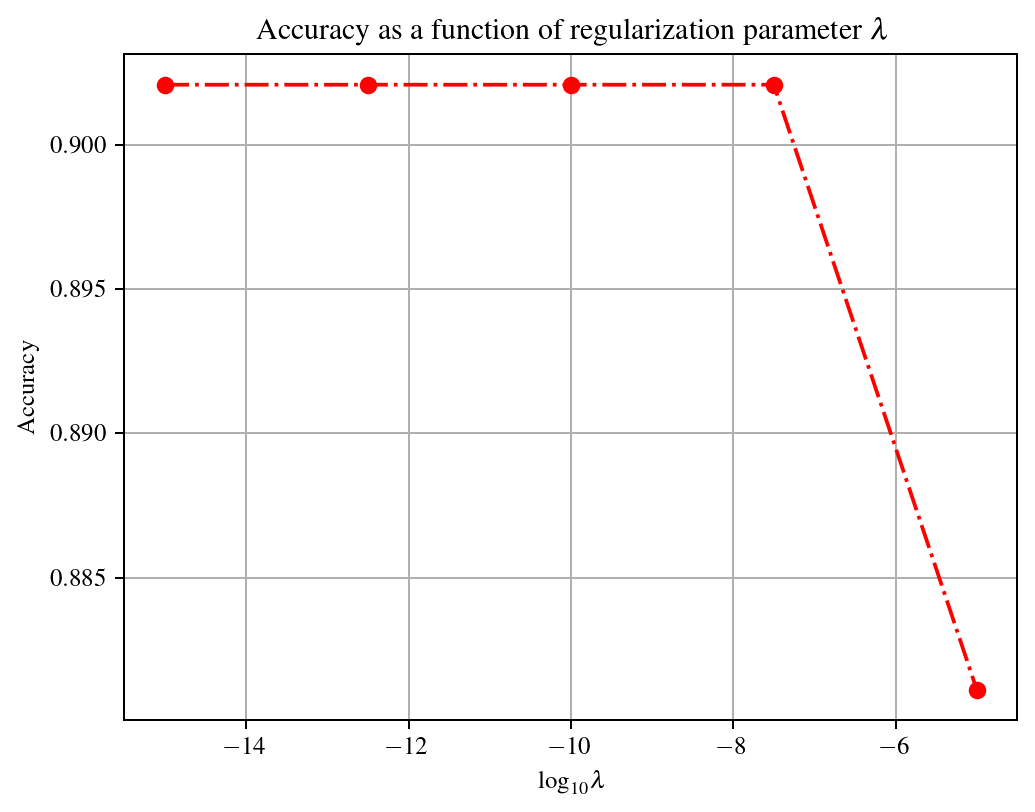

'Highest accuracy = 0.9020979020979021 at lambda = 1e-15'

In [159]:
metrics(X_train, y_train, X_test, y_test, variable="lmbda", type='classification')

epoch 1/500   error= 0.2360
epoch 2/500   error= 0.2345
epoch 3/500   error= 0.2345
epoch 4/500   error= 0.2345
epoch 5/500   error= 0.2345
epoch 6/500   error= 0.2344
epoch 7/500   error= 0.2344
epoch 8/500   error= 0.2344
epoch 9/500   error= 0.2344
epoch 10/500   error= 0.2344
epoch 11/500   error= 0.2344
epoch 12/500   error= 0.2344
epoch 13/500   error= 0.2344
epoch 14/500   error= 0.2343
epoch 15/500   error= 0.2343
epoch 16/500   error= 0.2343
epoch 17/500   error= 0.2343
epoch 18/500   error= 0.2343
epoch 19/500   error= 0.2343
epoch 20/500   error= 0.2343
epoch 21/500   error= 0.2342
epoch 22/500   error= 0.2342
epoch 23/500   error= 0.2342
epoch 24/500   error= 0.2342
epoch 25/500   error= 0.2342
epoch 26/500   error= 0.2342
epoch 27/500   error= 0.2342
epoch 28/500   error= 0.2341
epoch 29/500   error= 0.2341
epoch 30/500   error= 0.2341
epoch 31/500   error= 0.2341
epoch 32/500   error= 0.2341
epoch 33/500   error= 0.2341
epoch 34/500   error= 0.2340
epoch 35/500   error= 0

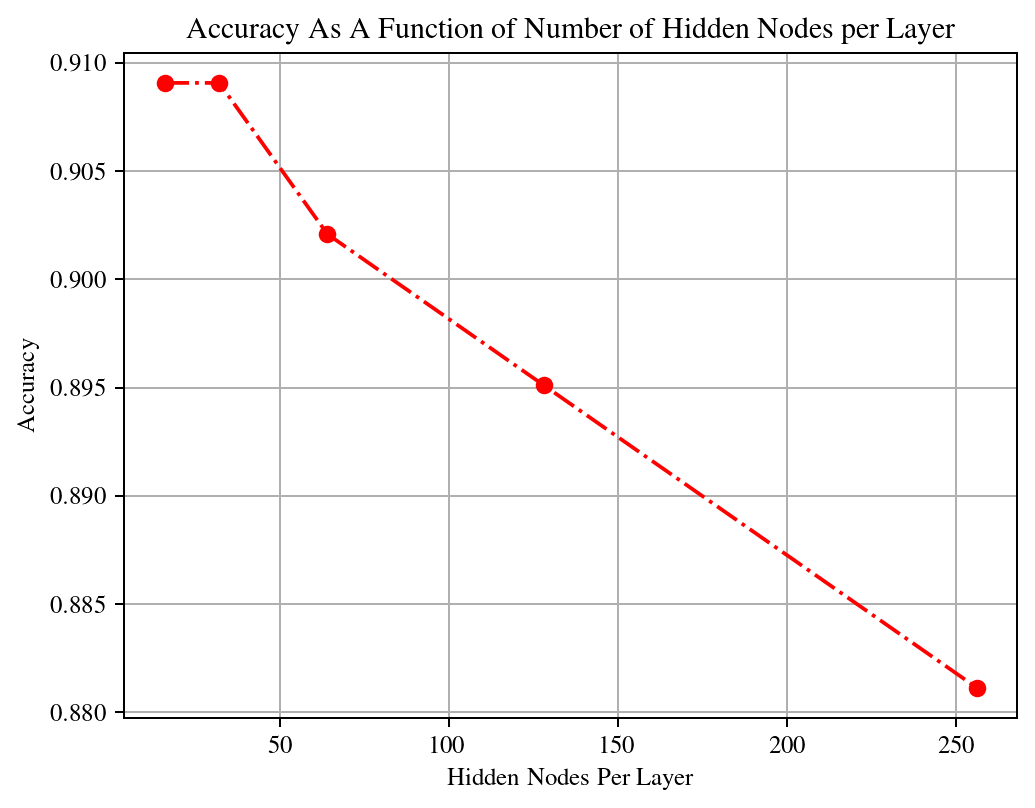

Maximum accuracy 0.9090909090909091 at 16 hidden nodes


In [160]:
metrics(X_train, y_train, X_test, y_test, "hidden_nodes", type = 'classification')

epoch 1/500   error= 0.2645
epoch 2/500   error= 0.2513
epoch 3/500   error= 0.2505
epoch 4/500   error= 0.2502
epoch 5/500   error= 0.2501
epoch 6/500   error= 0.2500
epoch 7/500   error= 0.2499
epoch 8/500   error= 0.2499
epoch 9/500   error= 0.2499
epoch 10/500   error= 0.2498
epoch 11/500   error= 0.2498
epoch 12/500   error= 0.2498
epoch 13/500   error= 0.2498
epoch 14/500   error= 0.2497
epoch 15/500   error= 0.2497
epoch 16/500   error= 0.2497
epoch 17/500   error= 0.2496
epoch 18/500   error= 0.2495
epoch 19/500   error= 0.2495
epoch 20/500   error= 0.2493
epoch 21/500   error= 0.2492
epoch 22/500   error= 0.2490
epoch 23/500   error= 0.2486
epoch 24/500   error= 0.2480
epoch 25/500   error= 0.2469
epoch 26/500   error= 0.2446
epoch 27/500   error= 0.2390
epoch 28/500   error= 0.2238
epoch 29/500   error= 0.1964
epoch 30/500   error= 0.1738
epoch 31/500   error= 0.1616
epoch 32/500   error= 0.1472
epoch 33/500   error= 0.1362
epoch 34/500   error= 0.1322
epoch 35/500   error= 0

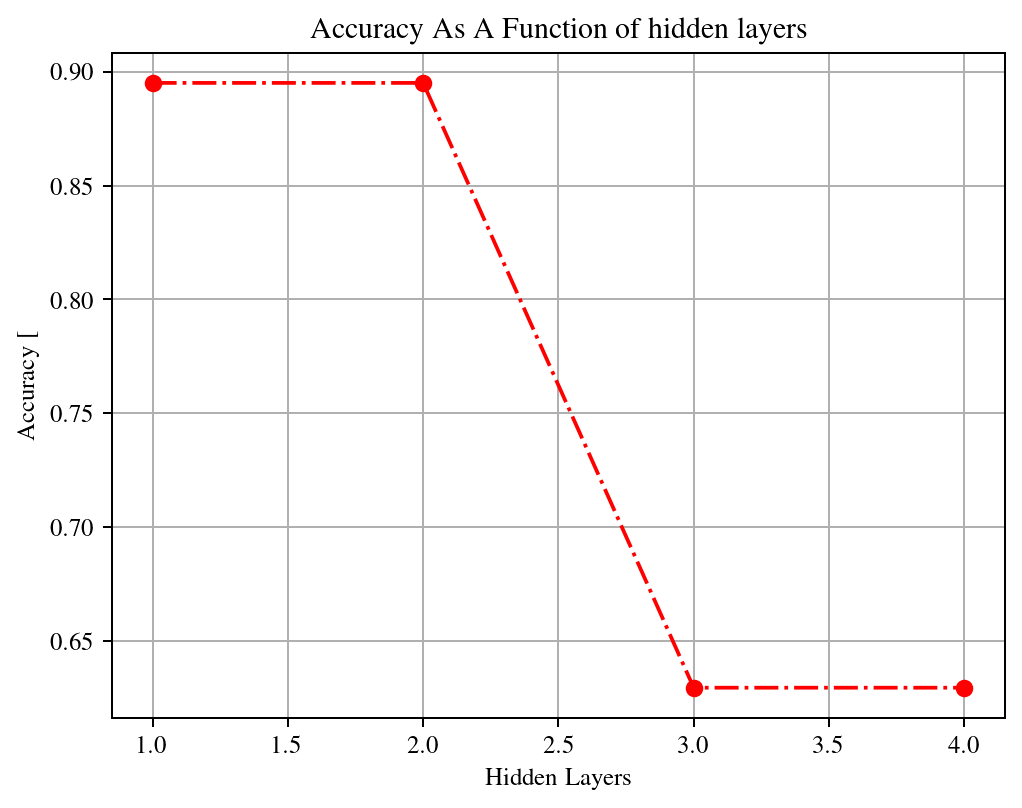

Maximum accuracy 0.8951048951048951 at 1 hidden nodes


In [168]:
metrics(X_train, y_train, X_test, y_test,variable = "hidden_layers", type = 'classification')

In [176]:
metrics(X_train, y_train, X_test, y_test,variable= "activation_function", type = 'classification')

sigmoid
epoch 1/500   error= 0.2360
epoch 2/500   error= 0.2345
epoch 3/500   error= 0.2345
epoch 4/500   error= 0.2345
epoch 5/500   error= 0.2345
epoch 6/500   error= 0.2344
epoch 7/500   error= 0.2344
epoch 8/500   error= 0.2344
epoch 9/500   error= 0.2344
epoch 10/500   error= 0.2344
epoch 11/500   error= 0.2344
epoch 12/500   error= 0.2344
epoch 13/500   error= 0.2344
epoch 14/500   error= 0.2343
epoch 15/500   error= 0.2343
epoch 16/500   error= 0.2343
epoch 17/500   error= 0.2343
epoch 18/500   error= 0.2343
epoch 19/500   error= 0.2343
epoch 20/500   error= 0.2343
epoch 21/500   error= 0.2342
epoch 22/500   error= 0.2342
epoch 23/500   error= 0.2342
epoch 24/500   error= 0.2342
epoch 25/500   error= 0.2342
epoch 26/500   error= 0.2342
epoch 27/500   error= 0.2342
epoch 28/500   error= 0.2341
epoch 29/500   error= 0.2341
epoch 30/500   error= 0.2341
epoch 31/500   error= 0.2341
epoch 32/500   error= 0.2341
epoch 33/500   error= 0.2341
epoch 34/500   error= 0.2340
epoch 35/500   

0

In [354]:
metrics(X_train, y_train, X_test, y_test,variable= "activation_function", type = 'classification')

sigmoid
epoch 1/500   error= 0.2360
epoch 2/500   error= 0.2345
epoch 3/500   error= 0.2345
epoch 4/500   error= 0.2345
epoch 5/500   error= 0.2345
epoch 6/500   error= 0.2344
epoch 7/500   error= 0.2344
epoch 8/500   error= 0.2344
epoch 9/500   error= 0.2344
epoch 10/500   error= 0.2344
epoch 11/500   error= 0.2344
epoch 12/500   error= 0.2344
epoch 13/500   error= 0.2344
epoch 14/500   error= 0.2343
epoch 15/500   error= 0.2343
epoch 16/500   error= 0.2343
epoch 17/500   error= 0.2343
epoch 18/500   error= 0.2343
epoch 19/500   error= 0.2343
epoch 20/500   error= 0.2343
epoch 21/500   error= 0.2342
epoch 22/500   error= 0.2342
epoch 23/500   error= 0.2342
epoch 24/500   error= 0.2342
epoch 25/500   error= 0.2342
epoch 26/500   error= 0.2342
epoch 27/500   error= 0.2342
epoch 28/500   error= 0.2341
epoch 29/500   error= 0.2341
epoch 30/500   error= 0.2341
epoch 31/500   error= 0.2341
epoch 32/500   error= 0.2341
epoch 33/500   error= 0.2341
epoch 34/500   error= 0.2340
epoch 35/500   

KeyboardInterrupt: 

#### Optimal values together

In [399]:
optimal_learning_rate_reg = 0.01
optimal_lambda_reg =  1e-15

In [404]:
net = class_reset_net(hidden_nodes=16,
         hidden_layers=1,
         act_func=relu,
         d_act_func=d_relu
 )


net.fit(X_train, y_train, epochs = 500, learning_rate = optimal_learning_rate_reg, lmbda=optimal_lambda_reg)  # Learning rate not 


(180, 2)
epoch 1/500   error= 0.2297
epoch 2/500   error= 0.2265
epoch 3/500   error= 0.2250
epoch 4/500   error= 0.2234
epoch 5/500   error= 0.2215
epoch 6/500   error= 0.2193
epoch 7/500   error= 0.2168
epoch 8/500   error= 0.2138
epoch 9/500   error= 0.2103
epoch 10/500   error= 0.2062
epoch 11/500   error= 0.2013
epoch 12/500   error= 0.1956
epoch 13/500   error= 0.1892
epoch 14/500   error= 0.1818
epoch 15/500   error= 0.1737
epoch 16/500   error= 0.1648
epoch 17/500   error= 0.1557
epoch 18/500   error= 0.1466
epoch 19/500   error= 0.1379
epoch 20/500   error= 0.1299
epoch 21/500   error= 0.1228
epoch 22/500   error= 0.1166
epoch 23/500   error= 0.1113
epoch 24/500   error= 0.1068
epoch 25/500   error= 0.1030
epoch 26/500   error= 0.0997
epoch 27/500   error= 0.0970
epoch 28/500   error= 0.0947
epoch 29/500   error= 0.0927
epoch 30/500   error= 0.0909
epoch 31/500   error= 0.0895
epoch 32/500   error= 0.0882
epoch 33/500   error= 0.0870
epoch 34/500   error= 0.0860
epoch 35/500  

In [411]:

predss = net.predict(X_test)

predss = make_binary(predss,0.5)

accuracy_score(predss, y_test)


0.9230769230769231

### Tensorflow benchmark

In [431]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

tf.random.set_seed(422)

model = Sequential([
    Dense(16, activation='tanh',kernel_regularizer=regularizers.L2(1e-15)),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    #optimizer = 'adam',
    metrics=['accuracy']
)



print(X_test.shape)
model.fit(X_train.reshape((426,30)), y_train.reshape((426,1)), epochs=500)

(143, 1, 30)
Epoch 1/500
14/14 [==============================] - 1s 22ms/step - loss: 0.6635 - accuracy: 0.6268
Epoch 2/500
14/14 [==============================] - 0s 12ms/step - loss: 0.6620 - accuracy: 0.6268
Epoch 3/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6604 - accuracy: 0.6268
Epoch 4/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.6268
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6586 - accuracy: 0.6268
Epoch 6/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6581 - accuracy: 0.6268
Epoch 7/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6578 - accuracy: 0.6268
Epoch 8/500
14/14 [==============================] - 0s 11ms/step - loss: 0.6574 - accuracy: 0.6268
Epoch 9/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6571 - accuracy: 0.6268
Epoch 10/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6569 - accuracy: 

In [432]:
predictions = model.predict(X_test)

predictions = np.array(predictions)

predictions = predictions.reshape(143,1)
predictions = make_binary(predictions,0.5)


print(accuracy_score(y_test, predictions))


5/5 [==============================] - 0s 12ms/step
0.8321678321678322


# Part e


#### Test run

In [348]:
net = class_reset_net(hidden_layers=0)


net.fit(X_train, y_train, epochs=1000, lmbda = 1e-7, learning_rate=1e-2)


y_pred = net.predict(X_test)   # Predict values (not 1 or 0)
y_pred = make_binary(y_pred,0.5)  # Make them 1 or 0

#print(len(y_pred), len(y_test))
accuracy_score(np.array(y_test), np.array(y_pred))



epoch 1/1000   error= 0.2404
epoch 2/1000   error= 0.2350
epoch 3/1000   error= 0.2348
epoch 4/1000   error= 0.2348
epoch 5/1000   error= 0.2347
epoch 6/1000   error= 0.2346
epoch 7/1000   error= 0.2345
epoch 8/1000   error= 0.2345
epoch 9/1000   error= 0.2344
epoch 10/1000   error= 0.2343
epoch 11/1000   error= 0.2343
epoch 12/1000   error= 0.2342
epoch 13/1000   error= 0.2341
epoch 14/1000   error= 0.2340
epoch 15/1000   error= 0.2340
epoch 16/1000   error= 0.2339
epoch 17/1000   error= 0.2338
epoch 18/1000   error= 0.2337
epoch 19/1000   error= 0.2337
epoch 20/1000   error= 0.2336
epoch 21/1000   error= 0.2335
epoch 22/1000   error= 0.2334
epoch 23/1000   error= 0.2333
epoch 24/1000   error= 0.2333
epoch 25/1000   error= 0.2332
epoch 26/1000   error= 0.2331
epoch 27/1000   error= 0.2330
epoch 28/1000   error= 0.2329
epoch 29/1000   error= 0.2328
epoch 30/1000   error= 0.2328
epoch 31/1000   error= 0.2327
epoch 32/1000   error= 0.2326
epoch 33/1000   error= 0.2325
epoch 34/1000   err

0.9230769230769231

### Logistic regression metrics analysis

epoch 1/1000   error= 0.2436
epoch 2/1000   error= 0.2417
epoch 3/1000   error= 0.2408
epoch 4/1000   error= 0.2399
epoch 5/1000   error= 0.2389
epoch 6/1000   error= 0.2377
epoch 7/1000   error= 0.2364
epoch 8/1000   error= 0.2348
epoch 9/1000   error= 0.2330
epoch 10/1000   error= 0.2308
epoch 11/1000   error= 0.2283
epoch 12/1000   error= 0.2252
epoch 13/1000   error= 0.2216
epoch 14/1000   error= 0.2173
epoch 15/1000   error= 0.2124
epoch 16/1000   error= 0.2067
epoch 17/1000   error= 0.2002
epoch 18/1000   error= 0.1930
epoch 19/1000   error= 0.1853
epoch 20/1000   error= 0.1773
epoch 21/1000   error= 0.1691
epoch 22/1000   error= 0.1610
epoch 23/1000   error= 0.1533
epoch 24/1000   error= 0.1460
epoch 25/1000   error= 0.1394
epoch 26/1000   error= 0.1333
epoch 27/1000   error= 0.1278
epoch 28/1000   error= 0.1230
epoch 29/1000   error= 0.1187
epoch 30/1000   error= 0.1148
epoch 31/1000   error= 0.1114
epoch 32/1000   error= 0.1083
epoch 33/1000   error= 0.1056
epoch 34/1000   err

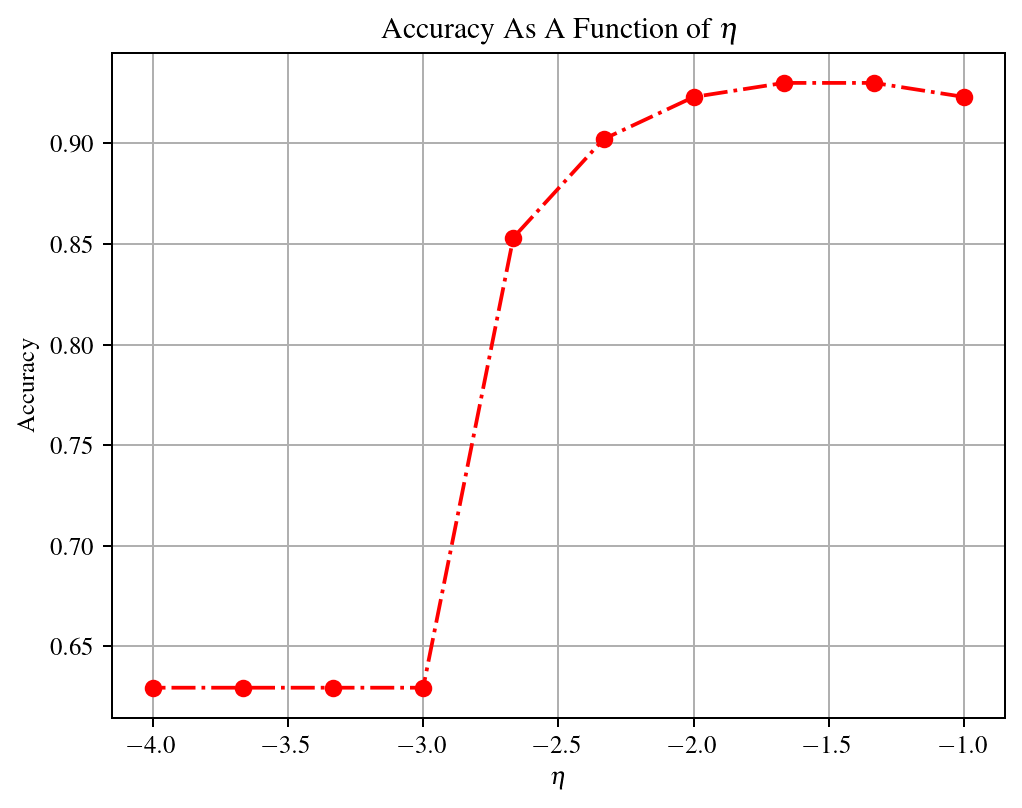

Maximum accuracy 0.9300699300699301 at learning rate: 0.046415888336127795


In [396]:
metrics(X_train, y_train, X_test, y_test, epochs = 1000, lmbda = 1e-7, hidden_layers=0, variable="learning_rates", type='classification')

epoch 1/300   error= 0.2401
epoch 2/300   error= 0.2381
epoch 3/300   error= 0.2377
epoch 4/300   error= 0.2374
epoch 5/300   error= 0.2370
epoch 6/300   error= 0.2366
epoch 7/300   error= 0.2362
epoch 8/300   error= 0.2358
epoch 9/300   error= 0.2354
epoch 10/300   error= 0.2349
epoch 11/300   error= 0.2344
epoch 12/300   error= 0.2338
epoch 13/300   error= 0.2332
epoch 14/300   error= 0.2326
epoch 15/300   error= 0.2319
epoch 16/300   error= 0.2311
epoch 17/300   error= 0.2303
epoch 18/300   error= 0.2293
epoch 19/300   error= 0.2283
epoch 20/300   error= 0.2272
epoch 21/300   error= 0.2261
epoch 22/300   error= 0.2247
epoch 23/300   error= 0.2233
epoch 24/300   error= 0.2218
epoch 25/300   error= 0.2201
epoch 26/300   error= 0.2182
epoch 27/300   error= 0.2162
epoch 28/300   error= 0.2141
epoch 29/300   error= 0.2117
epoch 30/300   error= 0.2092
epoch 31/300   error= 0.2065
epoch 32/300   error= 0.2037
epoch 33/300   error= 0.2006
epoch 34/300   error= 0.1974
epoch 35/300   error= 0

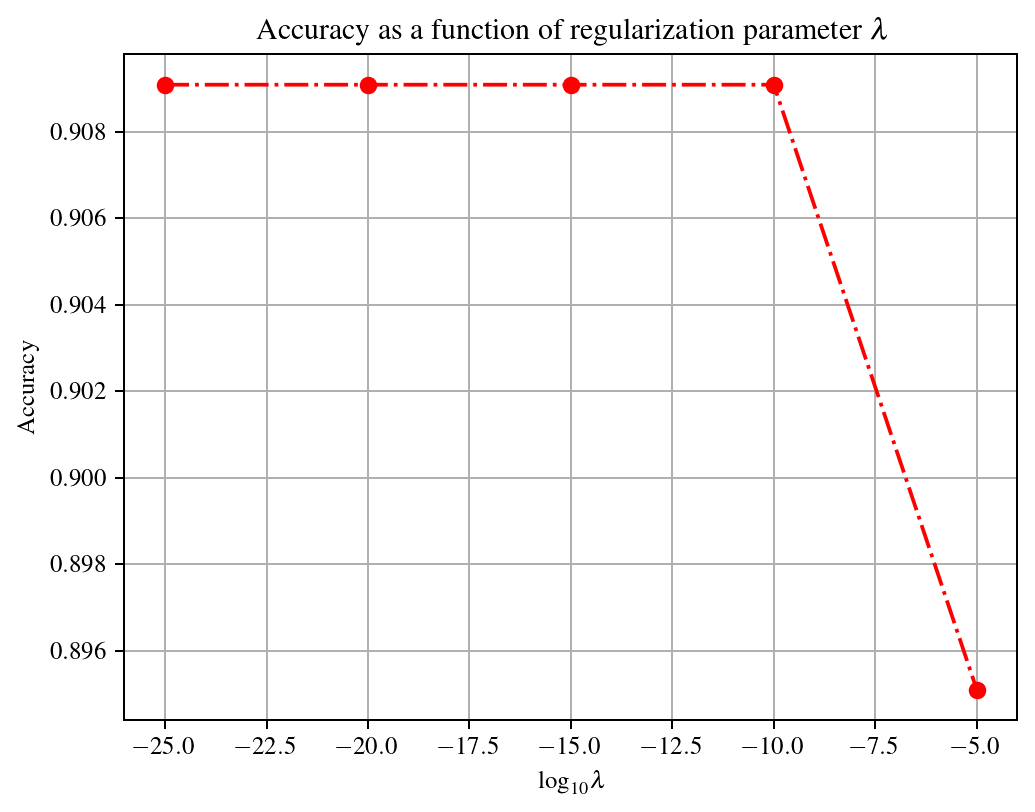

'Highest accuracy = 0.9090909090909091 at lambda = 1e-25'

In [393]:
metrics(X_train, y_train, X_test, y_test, epochs = 300,learning_rate= optimal_learning_rate_reg, hidden_layers=0, variable="lmbda", type='classification', output_func = sigmoid, d_output_func= d_sigmoid)


In [394]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state= random_state, max_iter = 1000, penalty = 'l2').fit(X_train.reshape(426,30), y_train.reshape(426,))
#print(X_test.shape)
clf.score(X_test.reshape(143,30), y_test)

0.7622377622377622